## Importing the heart failure dataset to this notebook

In [1]:
import pandas as pd
df=pd.read_csv('heart.csv')

## Displaying the number of rows and columns in the dataset

In [3]:
print('Number of rows and columns in the dataset: ',df.shape)

Number of rows and columns in the dataset:  (918, 12)


## Checking the column names and datatypes of each column

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


## Information on dataset attributes:

1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal


## Checking for Null values in the dataset

In [7]:
print('checking if there are any null values in the columns: \n', df.isna().sum())

checking if there are any null values in the columns: 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Checking the descriptive statistics to understand the data distribution

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Checking the datast for duplicate values 

In [11]:
duplicates=df.duplicated()
print('Number of duplicate values: ', duplicates.sum())

Number of duplicate values:  0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Plotting Kernel density estimate for numerical columns to understand the data distribution

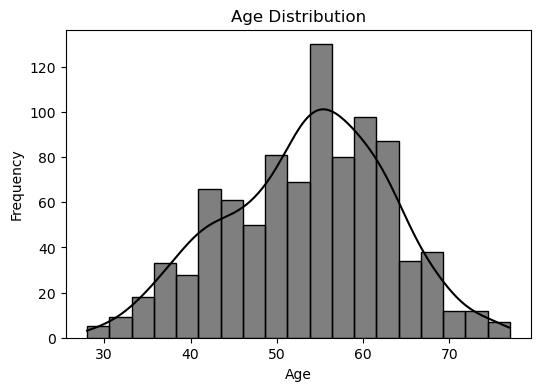

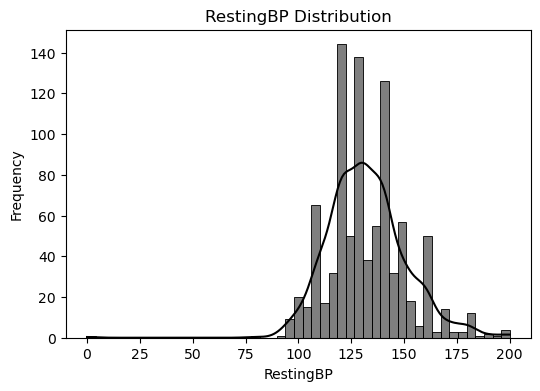

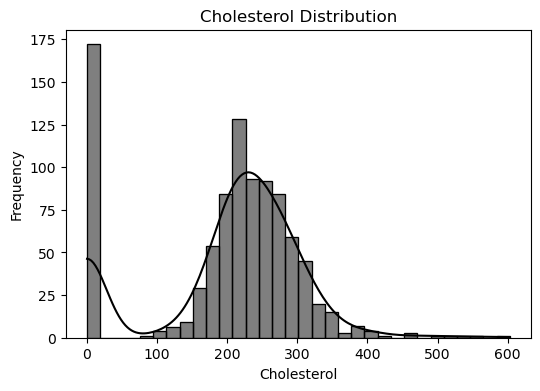

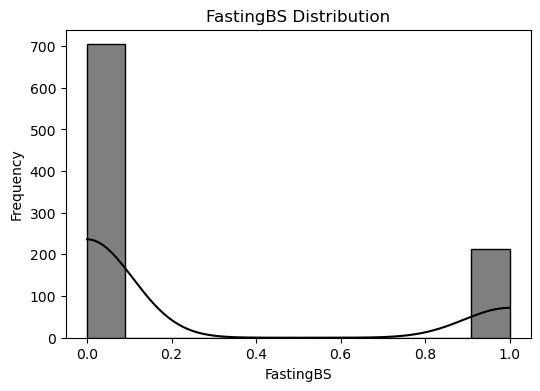

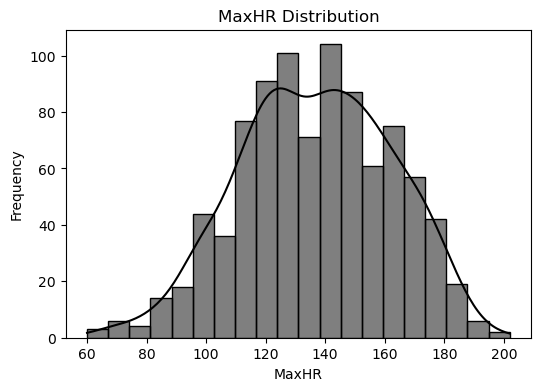

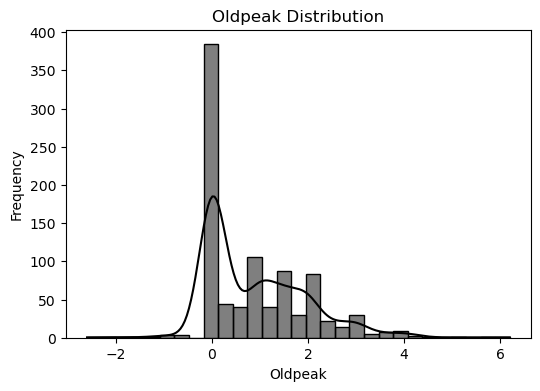

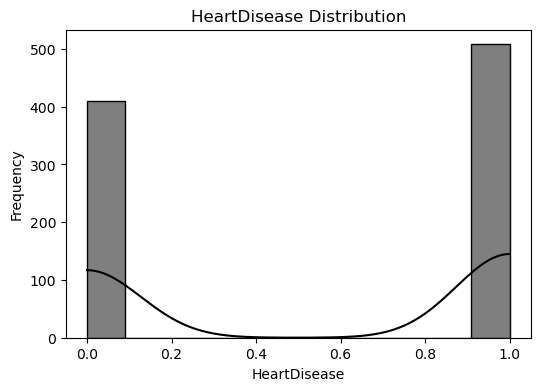

In [29]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6,4))  
    sns.histplot(df[col], color='black', kde=True)  
    plt.title(f'{col} Distribution') 
    plt.xlabel(col) 
    plt.ylabel('Frequency')  
    plt.show()  

## This KDE is to understand the count of categorical columns which are useful for heart disease prediction

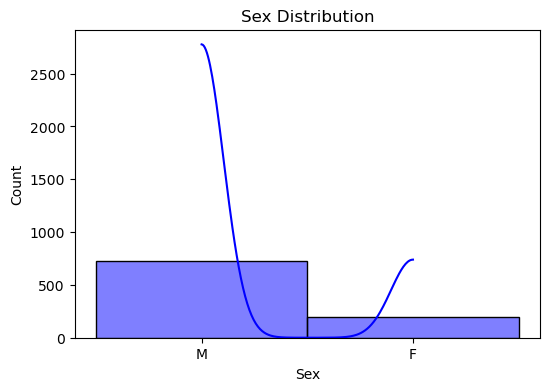

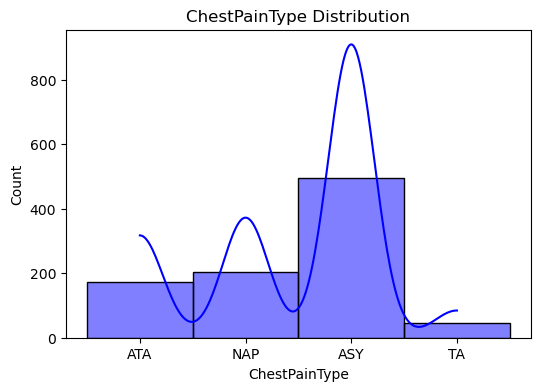

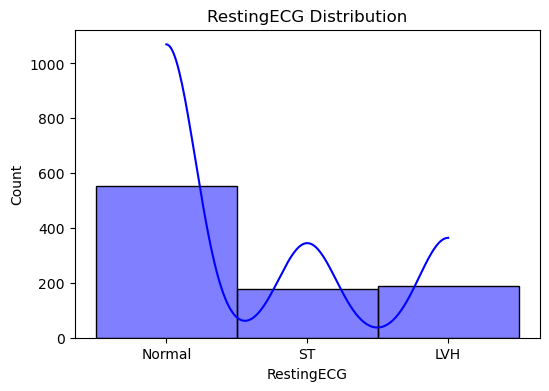

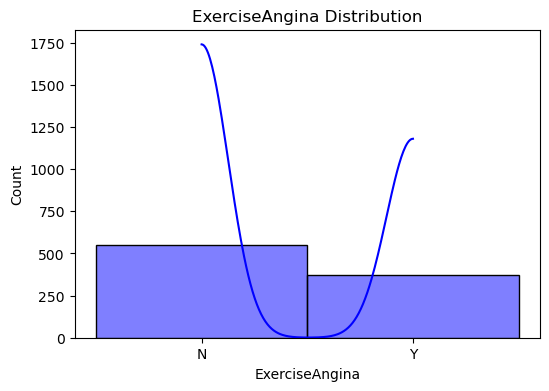

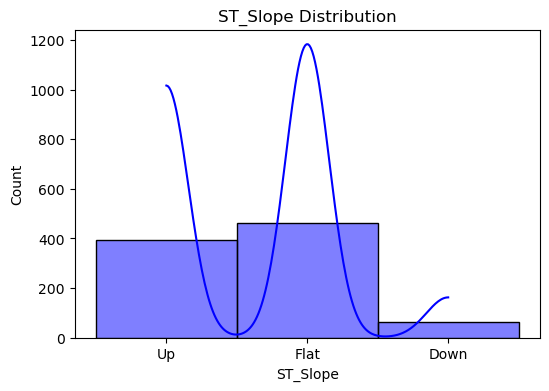

In [33]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],color='blue',kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Calculating the skewness and kurtosis of cholesterol (it has values starting from 0 which is not possible in reality, seems like error 

In [35]:
skewness_of_ch=df['Cholesterol'].skew()
print('skewness of Cholesterol is :', skewness_of_ch)
kurtosis_of_ch=df['Cholesterol'].kurtosis()
print('Kurtosis of Cholesterol is :', kurtosis_of_ch)

skewness of Cholesterol is : -0.6100864307268192
Kurtosis of Cholesterol is : 0.11820846851766742


## Box-Plot of cholesterol to understand data distribution and outliers

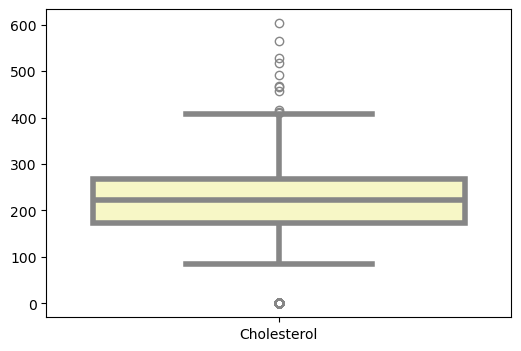

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Cholesterol']],linewidth=4,palette='Spectral')
plt.show()

## Calculating the skewness and kurtosis of Resting blood pressure (it has value which is 0(not possible in reality, seems like error) 

In [39]:
skewness_of_bp=df['RestingBP'].skew()
print('skewness of BP is: ',skewness_of_bp)
kurtosis_of_bp=df['RestingBP'].kurtosis()
print('Kurtosis of BP is: ',kurtosis_of_bp)

skewness of BP is:  0.1798393100516288
Kurtosis of BP is:  3.2712509168295356


## Box-Plot of RestingBP to understand data distribution and outliers

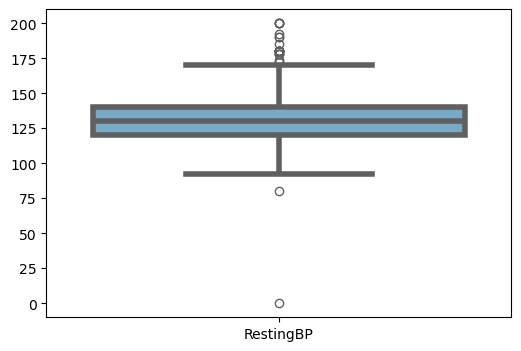

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['RestingBP']],linewidth=4,palette='Blues')
plt.show()

## Checking for 0's in both the columns, since bp has 1 row with 0 we can drop that row and significant number of rows are 0 for cholestrol, can be replaced by mean/median value  of cholestrol

In [43]:
cholesterol_zeros = (df['Cholesterol'] == 0).sum()
bp_zeros = (df['RestingBP'] == 0).sum()
print('Zero Cholesterol Count: ',cholesterol_zeros)
print('Zero Blood Pressure Count:', bp_zeros)

Zero Cholesterol Count:  172
Zero Blood Pressure Count: 1


## Dropping row with RestingBP=0

In [45]:
df = df[df['RestingBP'] != 0]

## Verifying that the row is removed and that RestingBP contains valid values

In [47]:
bp_zeros = (df['RestingBP'] == 0).sum()
print('Zero Blood Pressure Count:', bp_zeros)

Zero Blood Pressure Count: 0


## Calculating the median value of cholesterol and adding a new column Cholesterol_Replaced(0's are replaced with median value)

In [49]:
median_cholesterol = df['Cholesterol'].replace(0, np.nan).median()
df['Cholesterol_Replaced'] = df['Cholesterol'].replace(0, median_cholesterol)

/var/folders/81/h7g9vl291xlcg1n_j5swbmqw0000gn/T/ipykernel_2092/3441349394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol_Replaced'] = df['Cholesterol'].replace(0, median_cholesterol)


In [51]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Replaced
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,289
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,180
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,283
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,214
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,264
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,193
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,131
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,236


## Calculating the skewness and kurtosis of new column Cholesterol_Replaced

In [57]:
skewness_of_ch=df['Cholesterol_Replaced'].skew()
print('skewness of Cholesterol Replaced is :', skewness_of_ch)
kurtosis_of_ch=df['Cholesterol_Replaced'].kurtosis()
print('Kurtosis of Cholesterol Replaced is :', kurtosis_of_ch)

skewness of Cholesterol Replaced is : 1.4458630653800588
Kurtosis of Cholesterol Replaced is : 6.341001499078331


## Plotting Kernel density estimate for Cholesterol_Replaced to understand the data distribution after replacing zeros

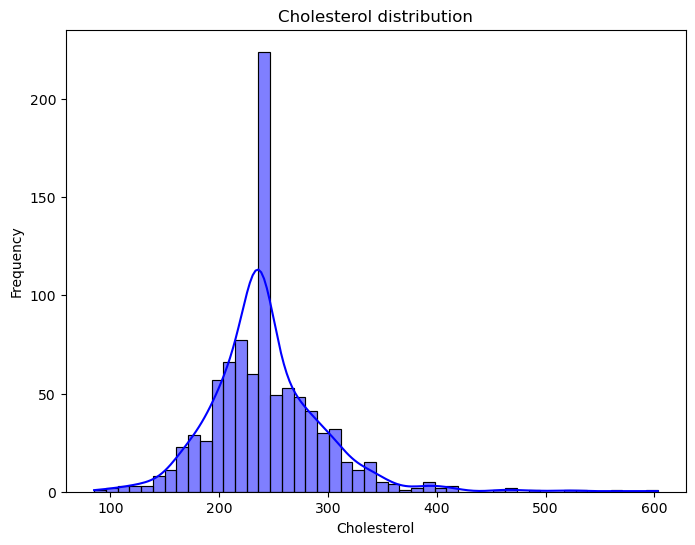

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(df['Cholesterol_Replaced'],color='blue',kde=True)
plt.title('Cholesterol distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

## Using log transformation to transform cholestrol and RestingBP (trying to get uniformly distributed data)

In [61]:
import numpy as np
df['chol_replaced_log'] = np.log(df['Cholesterol_Replaced'] + 1)
df['BP_replaced_log']=np.log(df['RestingBP']+1)

/var/folders/81/h7g9vl291xlcg1n_j5swbmqw0000gn/T/ipykernel_2092/3212464657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol_replaced_log'] = np.log(df['Cholesterol_Replaced'] + 1)
/var/folders/81/h7g9vl291xlcg1n_j5swbmqw0000gn/T/ipykernel_2092/3212464657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP_replaced_log']=np.log(df['RestingBP']+1)


## Verifying if the columns chol_replaced_log and BP_replaced_log are added

In [63]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Replaced,chol_replaced_log,BP_replaced_log
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,289,5.669881,4.948760
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,180,5.198497,5.081404
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,283,5.648974,4.875197
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,214,5.370638,4.934474
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,195,5.278115,5.017280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,264,5.579730,4.709530
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,193,5.267858,4.976734
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,131,4.882802,4.875197
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,236,5.468060,4.875197


## Calculating skewness and kurtosis of the log-transformed column chol_replaced_log. Since these are medical parameters,data may not be perfectly normally distributed and can show varied values.Trying to normalise may cause dataloss

In [65]:
skewness_of_ch=df['chol_replaced_log'].skew()
print('skewness of Cholesterol transformed by log is :', skewness_of_ch)
kurtosis_of_ch=df['chol_replaced_log'].kurtosis()
print('Kurtosis of Cholesterol transformed by log is :', kurtosis_of_ch)

skewness of Cholesterol transformed by log is : -0.08783311920926438
Kurtosis of Cholesterol transformed by log is : 2.6772537588396146


## Plotting Kernel density estimate for chol_replaced_log to understand the data distribution

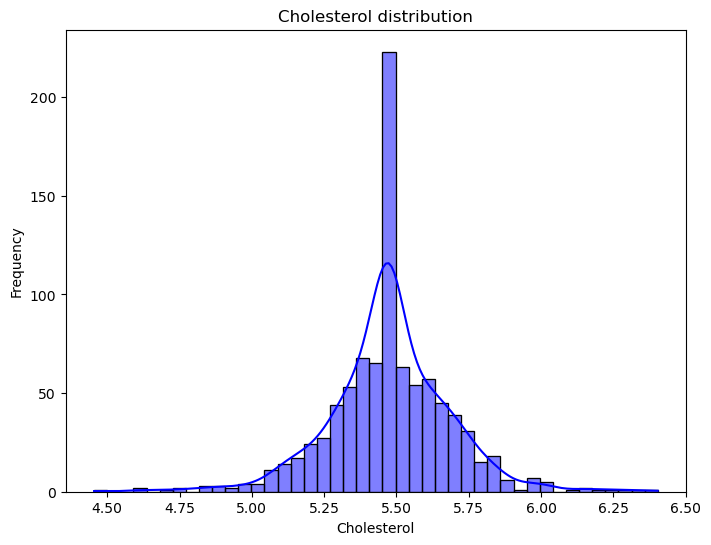

In [67]:
plt.figure(figsize=(8,6))
sns.histplot(df['chol_replaced_log'],color='blue',kde=True)
plt.title('Cholesterol distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

## Calculating skewness and kurtosis of the log-transformed column BP_replaced_log.Since these are medical parameters,data may not be perfectly normally distributed and can show varied values.Trying to normalise may cause dataloss

In [69]:
skewness_of_ch=df['BP_replaced_log'].skew()
print('skewness of BP transformed by log is :', skewness_of_ch)
kurtosis_of_ch=df['BP_replaced_log'].kurtosis()
print('Kurtosis of BP transformed by log is :', kurtosis_of_ch)

skewness of BP transformed by log is : 0.15050394577820558
Kurtosis of BP transformed by log is : 0.29687471791206566


## Plotting Kernel density estimate for BP_replaced_log to understand the data distribution

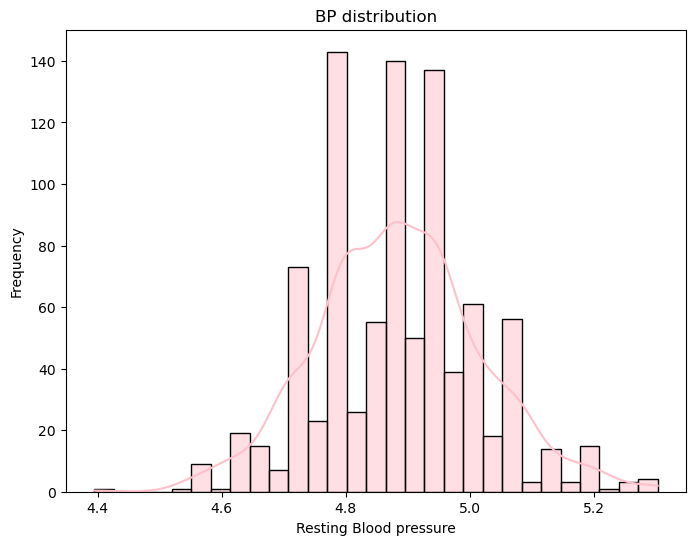

In [73]:
plt.figure(figsize=(8,6))
sns.histplot(df['BP_replaced_log'],color='pink',kde=True)
plt.title('BP distribution')
plt.xlabel('Resting Blood pressure')
plt.ylabel('Frequency')
plt.show()

## Calculating correlation coefficient for below columns to undestand the relationship between them and heart diseases.By looking at the result we can confirm that oldpeak has strong relationship compared to other parameters with heart failure,meaning higher the value of oldpeak higher the chances of heart failure

In [75]:
required_data = df[['Age', 'BP_replaced_log', 'chol_replaced_log', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
correlation_matrix = required_data.corr()
heart_disease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print("Correlation with Heart Disease:")
print(heart_disease_correlation)

Correlation with Heart Disease:
HeartDisease         1.000000
Oldpeak              0.403638
Age                  0.282012
FastingBS            0.267994
BP_replaced_log      0.113338
chol_replaced_log    0.086916
MaxHR               -0.401410
Name: HeartDisease, dtype: float64


## Heatmap with continuous columns with heart failure for correlation analysis.Confirms that oldpeak has strong relationship compared to other parameters

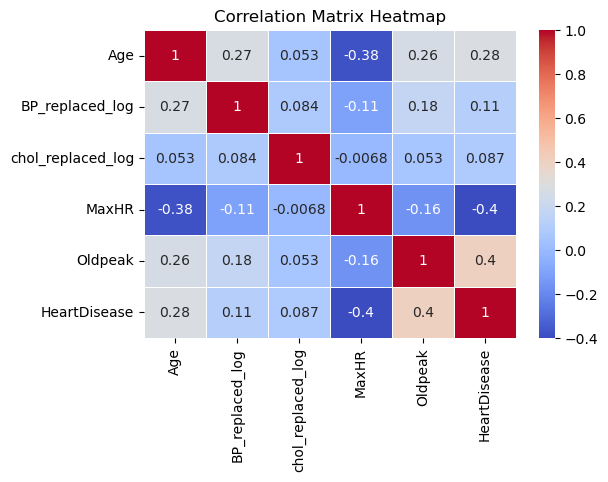

In [81]:
continuous_columns = df[['Age', 'BP_replaced_log', 'chol_replaced_log', 'MaxHR', 'Oldpeak','HeartDisease']]
correlation_matrix = continuous_columns.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## To understand how chestpain type is distributed across heart failure.we can observe that group of people who fall under asymptomatic category have had majority of heart failures

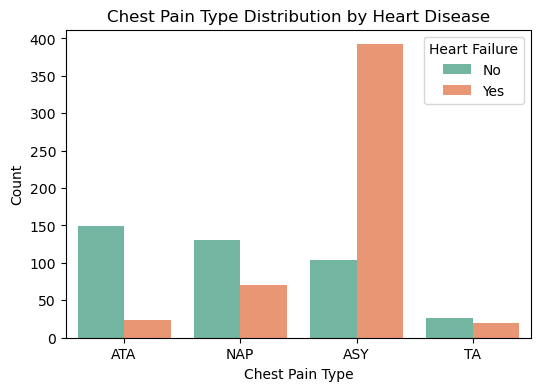

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='Set2')
plt.title('Chest Pain Type Distribution by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.show()

## To understand how sex of a person is distributed across heart failure.we can observe that males have had majority of heart failures

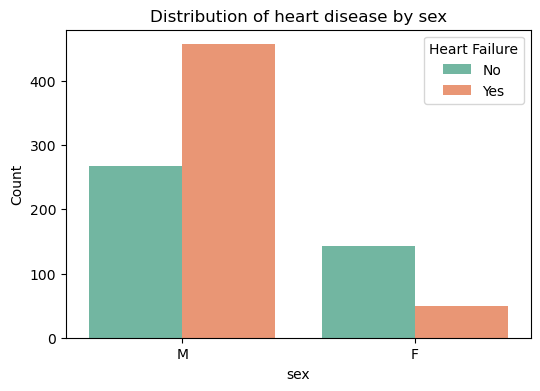

In [152]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='Set2')
plt.title('Distribution of heart disease by sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.show()

## Statistical analysis: Hypothesis testing:T-Test Analysis 

## To assess the differences in health metrics between patients with and without heart disease, T-test is demonstrated on key continuous columns: Age, Resting Blood Pressure, Cholesterol levels, Maximum Heart Rate (MaxHR) and Oldpeak.

1.	Null Hypothesis (H0): There is no real effect, difference, or relationship between the columns or groups being examined. 
2.	Alternative hypothesis (H1): suggests that there is a meaningful difference between the means of two groups. 
3.	The results indicate significant differences in all tested columns. Patients with heart disease tend to be older (t-statistic = -8.82, p < 0.0001) and have higher average resting blood pressure (t-statistic = -3.65, p < 0.001). 
4.	Interestingly, the average cholesterol levels are also significantly higher in those with heart disease (t-statistic = -2.31, p = 0.021), suggesting a clear risk factor.
5.	Moreover, patients without heart disease exhibit higher maximum heart rates (t-statistic = 13.26, p < 0.0001) and lower oldpeak values (t-statistic = -14.01, p < 0.0001), indicating better cardiovascular fitness.
6.	Overall, these findings highlight the differences in health profiles between the two groups, emphasizing the importance of these metrics in understanding heart disease risk hence we can reject Null hypothesis.


In [115]:
from scipy import stats
continuous_columns = df[['Age', 'RestingBP', 'Cholesterol_Replaced', 'MaxHR', 'Oldpeak']]

results = []
group_0 = df[df['HeartDisease'] == 0]  
group_1 = df[df['HeartDisease'] == 1]  
for col in continuous_columns:
    t_stat, p_value = stats.ttest_ind(group_0[col], group_1[col], equal_var=False) 
    results.append({'Column': col, 't-statistic': t_stat, 'p-value': p_value})  
results_df = pd.DataFrame(results)
print(results_df)

                 Column  t-statistic       p-value
0                   Age    -8.818398  6.561929e-18
1             RestingBP    -3.646512  2.809104e-04
2  Cholesterol_Replaced    -2.307565  2.125827e-02
3                 MaxHR    13.262607  1.015779e-36
4               Oldpeak   -14.014185  2.612468e-40


## Calculating averages of cholesterol,resting blood pressure and maximum heart rate for 2 categories(heart failure and no heart failure).


In [107]:
average_values = df.groupby('HeartDisease',observed=True)[['RestingBP', 'Cholesterol_Replaced', 'MaxHR']].mean().reset_index()
print(average_values)

  HeartDisease   RestingBP  Cholesterol_Replaced       MaxHR
0            0  130.180488            238.682927  148.151220
1            1  134.449704            246.873767  127.601578


## Statistical analysis:Hypothesis testing:Chi-Square tests

1. Null Hypothesis (H0): Assumes no association between the variables, meaning any differences in observed frequencies are due to chance
2. Alternative Hypothesis (H1): Suggests an association between variables, with the observed frequencies differing significantly from the       expected values.
1.	Sex (Chi-Square = 83.87, p < 0.0001): There is a strong association between sex and heart disease.
2.	RestingECG (Chi-Square = 11.07, p = 0.00395): Significant differences exist in heart disease status based on resting ECG results.
3.	ChestPainType (Chi-Square = 268.90, p < 0.0001): The type of chest pain is strongly correlated with heart disease.
4.	ExerciseAngina (Chi-Square = 223.11, p < 0.0001): Exercise angina shows a significant relationship with heart disease status.
5.	ST_Slope (Chi-Square = 355.16, p < 0.0001): There is a very strong association between ST slope and heart disease.
6.	To summarize, all these factors help healthcare professionals to take right clinical decisions.
7.	A p-value below 0.05 and a high Chi-Square statistic generally indicate a significant relationship, hence we can consider alternative        hypothesisisions. 


In [121]:
from scipy.stats import chi2_contingency
categorical_columns = ['Sex', 'RestingECG', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['HeartDisease'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    results.append({'column': col, 'Chi-Square Statistic': chi2_stat, 'p-value': p_value})
results_df = pd.DataFrame(results)
print(results_df)

           column  Chi-Square Statistic       p-value
0             Sex             83.871151  5.280956e-20
1      RestingECG             11.069537  3.947123e-03
2   ChestPainType            268.896258  5.348822e-58
3  ExerciseAngina            223.107207  1.899519e-50
4        ST_Slope            355.155699  7.566933e-78


## Calculating class imbalance on heart disease column

Class Counts:
HeartDisease
1    507
0    410
Name: count, dtype: int64


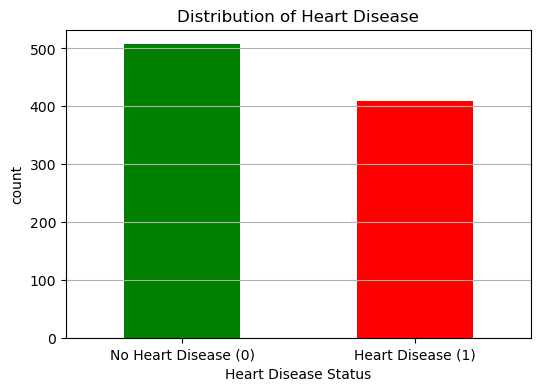

Imbalance ratio is:  1.2365853658536585


In [137]:
class_counts = df['HeartDisease'].value_counts()
print("Class Counts:")
print(class_counts)
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['Green', 'red'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Status')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'],rotation=0)
plt.ylabel('count')
plt.grid(axis='y')
plt.show()
imbalance_ratio = class_counts[1] / class_counts[0]
print('Imbalance ratio is: ',imbalance_ratio)